<a href="https://colab.research.google.com/github/pabloudea/Evaluacion_2023-1/blob/main/Copia_de_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

From http://pandas.pydata.org/pandas-docs/stable/

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

See also:

* https://github.com/restrepo/data-analysis
  * https://classroom.github.com/g/sSMBdBqN
  * https://classroom.github.com/a/PcbQBE7F
* https://github.com/restrepo/PythonTipsAndTricks
* https://pbpython.com/excel-pandas-comp.html [[archive.org](https://web.archive.org/web/20201126143453/https://pbpython.com/excel-pandas-comp.html)]

Good and practice books about `Pandas` possibilities are:


[__Python for Data Analysis__](https://drive.google.com/open?id=0BxoOXsn2EUNIWExXbVc4SDN0YTQ)<br/>
Data Wrangling with Pandas, NumPy, and IPython<br/>
_By William McKinney_


This other is about aplications based on `Pandas`:
![image.png](https://covers.oreillystatic.com/images/0636920030515/cat.gif) [Introduction to Machine Learning with Python](https://drive.google.com/open?id=0BxoOXsn2EUNISGhrdEZ3S29fS3M)<br/>
A Guide for Data Scientists
By Sarah Guido, Andreas Müller

[Python Books](https://drive.google.com/drive/u/0/folders/0BxoOXsn2EUNIUFFUWUkxd0JSVFk?resourcekey=0-Eo6AxHgut_mZ1-M3vD10oQ)

`Pandas` can be used in a similar way to `R`, which is based on similar data structures. `Pandas` also can replace the use of graphical interfaces to access spreadsheets like Excel. In particular, can be used in joint with the module [`xlsxwriter`](https://xlsxwriter.readthedocs.io/tutorial02.html) to produce professional Excel spreadsheets at the programatical level.

The similar data structure in Wolfram Alpha and Mathematica is  the `Dataset`, in C++ is the ROOT framework, and in the old Fortran 77 was `paw`. In this way, a dictionary of equivalent commands can be stablished between the several frameworks

```{contents}
:depth: 2
```

## Standard way to load the module

In [ ]:
import pandas as pd

## Introduction

We already saw how NumPy arrays can improve the analysis of numerical data. For heterogeneous data the recommended tool are Pandas dataframes.

Heterogeneous and nested data can be stored as list of dictionaries. For example, for people with names, birth date, sex, and a job list with start and end date, we can have

In [ ]:
# Create a dictionary for each person's data
person1 = {"Name": "John Doe", "Birth Date": "01-01-1980", "Sex": "Male", 
           "Job": [{"Job Title": "Software Engineer", "Start Date": "01-01-2000", "End Date": "01-01-2005"}, 
                   {"Job Title": "Data Scientist", "Start Date": "01-01-2005", "End Date": None}]}
person2 = {"Name": "Jane Doe", "Birth Date": "01-01-1985", "Sex": "Female", 
           "Job": [{"Job Title": "Product Manager", "Start Date": "01-01-2010", "End Date": "01-01-2015"}, 
                   {"Job Title": "Project Manager", "Start Date": "01-01-2015", "End Date": "01-01-2020"}]}
person3 = {"Name": "Jim Smith", "Birth Date": "01-01-1990", "Sex": "Male", 
           "Job": [{"Job Title": "Data Analyst", "Start Date": "01-01-2010", "End Date": "01-01-2015"}, 
                   {"Job Title": "Business Analyst", "Start Date": "01-01-2015", "End Date": "01-01-2020"}]}
person4 = {"Name": "Sara Johnson", "Birth Date": "01-01-1995", "Sex": "Female", 
           "Job": [{"Job Title": "Product Designer", "Start Date": "01-01-2015", "End Date": "01-01-2020"}, 
                   {"Job Title": "UX Designer", "Start Date": "01-01-2020", "End Date": None}]}

# Create a list of dictionaries
people = [person1, person2, person3, person4]

We can create a DataFrame from the list of dictionaries

In [ ]:
df = pd.DataFrame(people)
df

,Name,Birth Date,Sex,Job
0,John Doe,01-01-1980,Male,"[{'Job Title': 'Software Engineer', 'Start Dat..."
1,Jane Doe,01-01-1985,Female,"[{'Job Title': 'Product Manager', 'Start Date'..."
2,Jim Smith,01-01-1990,Male,"[{'Job Title': 'Data Analyst', 'Start Date': '..."
3,Sara Johnson,01-01-1995,Female,"[{'Job Title': 'Product Designer', 'Start Date..."


As with NumPy, we can create masks in order to filter out specific rows of the dataframe. For example, to filter out the female persons by using the syntax:

In [ ]:
df[df["Sex"] == "Female"]

,Name,Birth Date,Sex,Job
1,Jane Doe,01-01-1985,Female,"[{'Job Title': 'Product Manager', 'Start Date'..."
3,Sara Johnson,01-01-1995,Female,"[{'Job Title': 'Product Designer', 'Start Date..."


To filter out the last job of each person by using the following code (`.get` is a safer way to obtain the value of the key of a dictionary)

In [ ]:
df['Last job']=df["Job"].apply(lambda L: L[-1].get('Job Title'))
df[['Name','Birth Date','Sex','Last job']]

,Name,Birth Date,Sex,Last job
0,John Doe,01-01-1980,Male,Data Scientist
1,Jane Doe,01-01-1985,Female,Project Manager
2,Jim Smith,01-01-1990,Male,Business Analyst
3,Sara Johnson,01-01-1995,Female,UX Designer


## Basic structure: DataFrame

An flat _spreadsheet_ can be seen in terms of the types of variables of `Python` just as dictionary of lists, where each column of the spreadsheet is a pair key-list of the dictionary 

|   |  A   |  B   |
|---|:----:|:----:|
| 1 | even | odd  |
| 2 |   0  | 1    |
| 3 |   2  | 3    |
| 4 |   4  | 5    |
| 5 |   6  | 7    |
| 6 |   8  | 9    |

In [ ]:
numbers={"even": [0,2,4,6,8],   #  First  key-list
         "odd" : [1,3,5,7,9] }  #  Second key-list

## Data structures

`Pandas` has two new data structures:
1. `DataFrame` which are similar to numpy arrays but with some assigned key. For example, for the previous case
```python
import numpy as np
np.array([[0,1],
          [2,3],
          [4,5],
          [6,7],
          [8,9] 
         ])
```
1. `Series` which are enriched  to dictionaries, as the ones defined for the rows of the previous example: `{'even':0,'odd':1}`.




The rows in a two-dimensional `DataFrame` corresponds to `Series` with similar keys, while the columns are also Series with the indices as keys. 

An example of a  `DataFrame` is a spreadsheet, as the one before.

### `DataFrame`

`Pandas` can convert a dictionary of lists, like the `numbers` dictionary before, into a `DataFrame`, which is just an spreadsheet but interpreted at the programming level:

In [ ]:
numbers

{'even': [0, 2, 4, 6, 8], 'odd': [1, 3, 5, 7, 9]}

In [ ]:
import pandas as pd
df=pd.DataFrame(numbers)
df

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [ ]:
import matplotlib.pyplot as plt

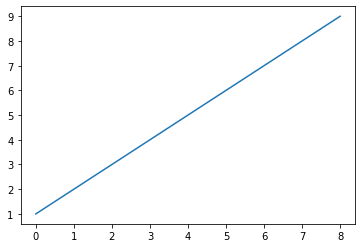

In [ ]:
plt.plot(df['even'],df['odd'])

See below for other possibilities of [creating Pandas DataFrames from lists and dictionaries](https://fisica.udea.edu.co:4443/user/restrepo/notebooks/prog/cursos/data-analysis/Pandas.ipynb#Intialization-from-lists-and-dictionaries)

The main advantage of the `DataFrame`,`df`, upon a spreadsheet, is that it can be managed just at the programming level without any graphical interface.

We can check the shape of the `DataFrame`

In [ ]:
df.shape

(5, 2)

####  Export DataFrame to other formats

* To export to excel:

In [ ]:
df.to_excel('example.xlsx',index=False)

In [ ]:
newdf=pd.read_excel('example.xlsx')
newdf

,even,odd
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [ ]:
newdf['fractions']=[0.5,2.5,4.5,6.5,8.5]
newdf

,even,odd,fractions
0,0,1,0.5
1,2,3,2.5
2,4,5,4.5
3,6,7,6.5
4,8,9,8.5


In [ ]:
newdf['next fractions']=1.5
newdf

,even,odd,fractions,next fractions
0,0,1,0.5,1.5
1,2,3,2.5,1.5
2,4,5,4.5,1.5
3,6,7,6.5,1.5
4,8,9,8.5,1.5


In [ ]:
newdf.loc[3,'next to next fractions']=1.7
newdf

,even,odd,fractions,next fractions,"(3, next to next fractions)",next to next fractions
0,0,1,0.5,1.5,1.7,NaN
1,2,3,2.5,1.5,1.7,NaN
2,4,5,4.5,1.5,1.7,NaN
3,6,7,6.5,1.5,1.7,1.7
4,8,9,8.5,1.5,1.7,NaN


__Activity__: Open the resulting spreadsheet in Google Drive, publish it and open from the resulting link with Pandas in the next cell

In [ ]:
df=pd.read_excel('PASTE THE PUBLISHED LINK HERE')
df

In [ ]:
df=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ1HFwErJcHkkOCT4Je-yuLSRe2L_GKWcCGVooc6rbOvTLxJhqglTZh31I_eB_dcw/pub?output=xlsx')
df

,even,odd
0,0.0,1.0
1,2.0,3.0
2,4.0,5.0
3,6.0,7.0
4,8.0,9.0


### `Series`

Each column of the DataFrame is now an augmented dictionary called `Series`, with the indices as the keys of the `Series`

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [ ]:
df['even']

0    0
1    2
2    4
3    6
4    8
Name: even, dtype: int64

In [ ]:
type( df['even'] )

pandas.core.series.Series

In [ ]:
df.even

0    0
1    2
2    4
3    6
4    8
Name: even, dtype: int64

The keys are the index of the `DataFrame`

In [ ]:
#df['even']
df.even[4]

8

Each row is also a series

In [ ]:
df.loc[0]

even    0
odd     1
Name: 0, dtype: int64

with keys: `'even'` and `'odd'`

or as a filter

In [ ]:
df.loc[[4]]

,even,odd
4,8,9


In [ ]:
df.loc[0]['even']

0

or attributes `even` and `odd`

In [ ]:
df.loc[0].odd

1

One specific cell value can be reached with the index and the key:

In [ ]:
df.iloc[2,1]

In [ ]:
df.loc[2,'odd']

5

In [ ]:
df.at[2,'even']

4

A `Pandas` `Series` object can be just initialized from a `Python` dictionary:

In [ ]:
s=pd.Series({'Name':'Juan Valdez','Nacionality':'Colombia','Age':23})
s

Name           Juan Valdez
Nacionality       Colombia
Age                     23
dtype: object

In [ ]:
s['Name']

'Juan Valdez'

but also as containers of name spaces!

In [ ]:
s.Name

'Juan Valdez'

> The __power__ of Pandas rely in that their main data structures: `DataFrames` and `Series`, are enriched with many useful methods and attributes.

__[Official definition of Pandas](http://pandas.pydata.org/pandas-docs/stable/)__

> Pandas is a Python package providing __fast__, __flexible__, and __expressive__ _data structures_ designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it _has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool_ available in any language. It is already well on its way toward this goal.

* "relational": the list of data is identified with some unique index (like a `SQL` table)
* "labeled": the list is identified with a key, like the previous `odd` or `even` keys.


For example. A double bracket `[[...]]`, can be used to filter data.

A row in a two-dimensional `DataFrame` corresponds to `Series` with the same keys of the `DataFrame`, but with single values instead of a list 

In [ ]:
df.loc[[0]]

,even,odd
0,0,1


To filter a column:

In [ ]:
df[['odd']]

,odd
0,1
1,3
2,5
3,7
4,9


## `DataFrame` initialization

### Initialization from an existing spreadsheet. 

This can be locally in your computer o from some downloadable  link

In [ ]:
df=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


To make a downloadable link for any spread sheet in Google Drive, follow the sequence:
```
File → Publish to the web...→ Entire Document → Web page → Microsoft excel (xlsx)
```
as illustrated in the figure:
![GS](https://github.com/restrepo/data-analysis/blob/master/img/img1.png?raw=1)

In [ ]:
df.loc[0,'Edad']=32
#df.at[0,'Edad']=32
df

,Nombre,Edad,Compañia
0,Juan Valdez,32.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


*After* some modification

it can be saved again as an `excel file` with the option to not create a column of indices: `index=False`

### Initialization from lists and dictionaries

#### Inizialization from Series
We start with an empty `DataFrame`:

Creating Pandas DataFrame from list and dictionaries [offers many alternatives](http://pbpython.com/pandas-list-dict.html)

![creating dataframes](http://pbpython.com/images/pandas-dataframe-shadow.png)

#### Column oriented way
* In addition to the dictionary of lists [already illustrated at the beginning]() that in this case corresponds to:

In [ ]:
pd.DataFrame({'Nombre'   : ['Juan Valdez','Álvaro Uribe Vélez'],
              'Edad'     : [32,            69                 ],
              'Compañia' : ['Café de Colombia','Senado de la República']})

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,69,Senado de la República


* We can obtain the DataFrame from list of items

In [ ]:
pd.DataFrame.from_items([ [ 'Nombre'  , ['Juan Valdez','Álvaro Uribe Vélez']],
                          [ 'Edad'    , [  32,            65               ]],
                          [ 'Compañia', ['Café de Colombia','Senado de la República']] ])

* We can obtain the `DataFrame` from dictionary

In [ ]:
pd.DataFrame( [{'Nombre':'Juan Valdez',        'Edad': 32   ,'Compañia':'Café de Colombia'      },
              {'Nombre':'Álvaro Uribe Vélez', 'Edad': 65   ,'Compañia':'Senado de la República'}]
            )

,Nombre,Edad,Compañia
0,Juan Valdez,32,Café de Colombia
1,Álvaro Uribe Vélez,65,Senado de la República


### Special DataFrames

#### Empty DataFrame

In [ ]:
df=pd.DataFrame()
df

""


In [ ]:
df.empty

True

#### Single row DataFrame from dictionary

In [ ]:
d={
    'first key' :'first value',
    'second key':'second value'

  }
pd.DataFrame([d])

,first key,second key
0,first value,second value


### Initialization from sequential rows as  Series

We start with an empty `DataFrame`:

In [49]:
import pandas as pd
df=pd.DataFrame()
df.empty

True

We can append a dictionary (or Series) as a row of the `DataFrame`, provided that we always use the option: `ignore_index=True`

In [50]:
d={'Name':'Juan Valdez','Nacionality':'Colombia','Age':23}
df=pd.concat([df,pd.DataFrame([d])])
df

,Name,Nacionality,Age
0,Juan Valdez,Colombia,23


To add a second file we build another `dict`

In [51]:
d={}
for k in ['Name','Nacionality','Age','Company']:
    var=input(f'{k}:\n')
    if k=='Age':
      var=int(var)
    #var=input('{}:\n'.format(k))
    d[k]=var

Name:
Luis Toloza
Nacionality:
PR
Age:
51
Company:
Nain


In [52]:
d

{'Name': 'Luis Toloza', 'Nacionality': 'PR', 'Age': 51, 'Company': 'Nain'}

In [53]:
df=pd.concat([df,pd.DataFrame([d])])
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
0,Luis Toloza,PR,51,Nain


#### Exercises
* Display the resulting `Series` in the screen:

In [54]:
df['Name']

0    Juan Valdez
0    Luis Toloza
Name: Name, dtype: object

__Activity__: Append a new row to the previous `DataFrame` and visualize it:

In [55]:
d2={'Name':'Taylor Swift','Nacionality':'USA','Age':30}
df=pd.concat([df,pd.DataFrame([d2])])
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
0,Luis Toloza,PR,51,Nain
0,Taylor Swift,USA,30,NaN


* Fill NaN with empty strings

In [56]:
df=df.fillna('')

In [57]:
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,
0,Luis Toloza,PR,51,Nain
0,Taylor Swift,USA,30,


* Save `Pandas` `DataFrame` as an Excel file

In [58]:
df.to_excel('prof.xlsx',index=False)

* Load pandas DataFrame from the saved file in Excel

In [59]:
pd.read_excel('prof.xlsx')

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
1,Luis Toloza,PR,51,Nain
2,Taylor Swift,USA,30,NaN


## Other formats to saving and read files

We are interested in format which keeps the tags of the columns, like `'Nombre', 'Edad', 'Compañia'`

In [60]:
import pandas as pd

In [61]:
df2=pd.read_excel('http://bit.ly/spreadsheet_xlsx')
df2

,Nombre,Edad,Compañia
0,Juan Valdez,23.0,Café de Colombia
1,Álvaro Uribe Vélez,65.0,Senado de la República


In [62]:
type(df2.loc[0,'Edad'])

numpy.float64

### CSV

Comma separated values

In [63]:
df.to_csv('hoja.csv',index=False)

In [64]:
cat hoja.csv

Name,Nacionality,Age,Company
Juan Valdez,Colombia,23,
Luis Toloza,PR,51,Nain
Taylor Swift,USA,30,


We can check the explicit file format with

In [65]:
print(df.to_csv(None,index=False))

Name,Nacionality,Age,Company
Juan Valdez,Colombia,23,
Luis Toloza,PR,51,Nain
Taylor Swift,USA,30,



In [66]:
pd.read_csv('hoja.csv')

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,NaN
1,Luis Toloza,PR,51,Nain
2,Taylor Swift,USA,30,NaN


### JSON

This format keeps the Python lists and dictionaries at the storage level

In [67]:
df3=pd.DataFrame([{"Name":"Donald Trump","Age":74},
                 {"Name":"Barak Obama", "Age":59}])
df3

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


This format allow us to keep exactly the very same list of dictionaries structure!

In [68]:
print(df3.to_json(None,orient='records'))

[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]


__Activity__: 
* Save to a file instead of `None` and open the file with some editor. 

In [69]:
df3.to_json('presidents.json',orient='records')

* Add a break-line at the end of the first dictionary and try to
load the resulting file with `pd.read_json`

In [70]:
pd.read_json('presidents.json')

,Name,Age
0,Donald Trump,74
1,Barak Obama,59


In [71]:
# %load presidents.json
[{"Name":"Donald Trump","Age":74},{"Name":"Barak Obama","Age":59}]

[{'Name': 'Donald Trump', 'Age': 74}, {'Name': 'Barak Obama', 'Age': 59}]

JSON allows for some flexibility in the break-lines structure:

In [72]:
hm='''
hola
mundo
'''

In [73]:
hm

'\nhola\nmundo\n'

In [74]:
[
    {"Name":
     "Donald Trump","Age":74},{"Name": #en cualquier parte
                               "Barak Obama","Age":59}

#Un comentario
]

[{'Name': 'Donald Trump', 'Age': 74}, {'Name': 'Barak Obama', 'Age': 59}]

In [75]:
pd.read_json('''
             [{"Name":"Donald Trump","Age":73},
              {"Name":"Barak Obama", "Age":58}]
            ''')

,Name,Age
0,Donald Trump,73
1,Barak Obama,58


For large databases it is convinient just to accumulate dictionaries in a sequential form:

In [76]:
print(df3.to_json(None,orient='records',lines=True))

{"Name":"Donald Trump","Age":74}
{"Name":"Barak Obama","Age":59}



In [77]:
df4=pd.read_json('''
             {"Name":"Donald Trump, Junior","Age":73}
             {"Name":"Barak Obama, Senior", "Age":58}
            ''',orient='records',lines=True)

In [78]:
df4

,Name,Age
0,"Donald Trump, Junior",73
1,"Barak Obama, Senior",58


In [79]:
df4["name"]=df4['Name'].str.split(', ').str[0]

In [80]:
df4

,Name,Age,name
0,"Donald Trump, Junior",73,Donald Trump
1,"Barak Obama, Senior",58,Barak Obama


In [81]:
df4=pd.read_json('''
             {"Name":"Donald Trump Junior","Age":73}
             {"Name":"Barak Obama Senior", "Age":58}
            ''',orient='records',lines=True)

In [82]:
df4

,Name,Age
0,Donald Trump Junior,73
1,Barak Obama Senior,58


In [83]:
l=['A','B']

In [84]:
''.join(l)

'AB'

In [85]:
df4['name']=df4.Name.str.split().str[:-1].apply(lambda s: ' '.join(s))
df4

,Name,Age,name
0,Donald Trump Junior,73,Donald Trump
1,Barak Obama Senior,58,Barak Obama


__Activity__: 
* Save to a file instead of `None`, with options: `orient='records',lines=True`, and open the file with some editor. 

In [86]:
df4.to_json('presidents.json',orient='records',lines=True)

In [87]:
cat presidents.json

{"Name":"Donald Trump Junior","Age":73,"name":"Donald Trump"}
{"Name":"Barak Obama Senior","Age":58,"name":"Barak Obama"}


* Add a similar dictionary in the next new line, and try to
load the resulting file with `pd.read_json` with options: `orient='records',lines=True`. 
   * WARNING: Use doble-quotes `"` to write the keys od the new
dictionary

In [88]:
pd.read_json('presidents.json',orient='records',lines=True)

,Name,Age,name
0,Donald Trump Junior,73,Donald Trump
1,Barak Obama Senior,58,Barak Obama


Any Python string need to be converted first to double-quotes before to be used as JSON string.

__Example__

In [89]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [90]:
numbers

{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}

In [91]:
str(numbers)

"{'even': [0, 2, 4, -6, 8], 'odd': [1, 3, -5, 7, 9]}"

This string can be writing in the `JSON` format by replacing the single quotes, ' , by  duoble quotes, ":

In [92]:
"hola mundo cruel".replace('cruel','radiante')

'hola mundo radiante'

In [93]:
str(numbers).replace("'",'"')

'{"even": [0, 2, 4, -6, 8], "odd": [1, 3, -5, 7, 9]}'

and now can be used as an JSON input

In [94]:
df5=pd.read_json(  str(numbers).replace("'",'"') )
df5

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


__Activity__: Try to read the string as JSON without make the double-quote replacement

## Common operations upon `DataFrames`

See [https://github.com/restrepo/PythonTipsAndTricks](https://github.com/restrepo/PythonTipsAndTricks)

* __To fill a specific cell__

In [100]:
df.reindex()
df.at[0,'Company']='Federación de Caferos'

In [101]:
df

,Name,Nacionality,Age,Company
0,Juan Valdez,Colombia,23,Federación de Caferos
1,Luis Toloza,PR,51,Nain
2,Taylor Swift,USA,30,


## Filters (masking)

The main application of labeled data for data analysis is the possibility to make filers, or cuts, to obtain specific reduced datasets to further analysis

In [102]:
import pandas as pd

In [103]:
numbers={"even": [0,2,4,-6,8],   #  First  key-list
         "odd" : [1,3,-5,7,9] }  #  Second key-list

In [104]:
df6=pd.DataFrame(numbers)

In [105]:
df6

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


A _mask_ is a list of `True/False` values

In [106]:
df6.even.abs()>4

0    False
1    False
2    False
3     True
4     True
Name: even, dtype: bool

In [107]:
df6[df6.even.abs()>4]

,even,odd
3,-6,7
4,8,9


and → `&`

In [108]:
df6[(df6.even>0) & (df6.odd<0)]

,even,odd
2,4,-5


negation → `~`

In [109]:
df6[~((df6.even>0) & (df6.odd<0)) ]

,even,odd
0,0,1
1,2,3
3,-6,7
4,8,9


or → `|`

In [110]:
df6[(df6.even<0) | (df6.odd<0)]

,even,odd
2,4,-5
3,-6,7


## The `apply` method

The advantage of the spreadsheet paradigm is that the columns can be transformed with functions. All the typical functions avalaible for a spreadsheet are already implemented like the method `.abs()` used before, or the method: `.sum()`

In [111]:
df6.even.sum()

8

__Activity__: Explore the avalaible methods by using the completion system of the notebook after the last semicolon of `df.even.`

In [113]:
kk=df6['even']

In [115]:
kk.items

<bound method Series.items of 0    0
1    2
2    4
3   -6
4    8
Name: even, dtype: int64>

df['even'].ipynb_checkpoints/

### Column-level `apply`
We just select the column and apply the direct or implicit function:
* Pre-defined function

In [116]:
df6.even.apply(abs)

0    0
1    2
2    4
3    6
4    8
Name: even, dtype: int64

* Implicit function

In [117]:
df6.even.apply(lambda n:isinstance(n,int))

0    True
1    True
2    True
3    True
4    True
Name: even, dtype: bool

In [118]:
df6.even.apply(lambda n: n**2)

0     0
1     4
2    16
3    36
4    64
Name: even, dtype: int64

### Row-level apply
The foll row is passed as dictionary to the explicit or implicit function when `apply` is used for the full `DataFrame` and the option `axis=1` is used at the end

In [119]:
df6

,even,odd
0,0,1
1,2,3
2,4,-5
3,-6,7
4,8,9


In [120]:
df6['even']+df6['odd']**2

0     1
1    11
2    29
3    43
4    89
dtype: int64

In [121]:
df6.apply(lambda row: row['even']+row['odd']**2,axis='columns')

0     1
1    11
2    29
3    43
4    89
dtype: int64

In [122]:
df6.apply(lambda row: row.get('even')+row.get('odd')**2,axis='columns')

0     1
1    11
2    29
3    43
4    89
dtype: int64

## Chain tools for data analysis

There are several chain tools for data analyis like the
* Spreadsheet based one, like Excel 
* Relational databases with the use of more advanced SQL tabular data with some data base software like MySQL
* Non-relational databases (RAM) with Pandas, R,  Paw,... ( max ~ RAM/8) 
* Non-relational databases (Disk): Dask, ROOT, MongoDB,...

Here we illustrate an example of use fo a non-relational database with Pandas

## Relational databases

In [123]:
import pandas as pd

In [124]:
personas=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/personas.csv')
#personas=pd.read_csv('../data/personas.csv')
personas

,Nombre,Fecha de Nacimiento,id
0,Juan Valdez,1966-07-04,888
1,Álvaro Uribe Vélez,1952-07-04,666


In [125]:
import pandas as pd
trabajos=pd.read_csv('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/trabajos.csv',
                     na_filter=False)
trabajos

,id,Inicio,Fin,Cargo,Compañía
0,888,2010,,Arriero,Café de Colombia
1,666,2013,2020,Senador,Senado de la República de Colombia
2,666,2020,,Influencer,Twitter


![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/relation.svg)

### Activity
Obtain the current work of Álavro Uribe Vélez 

In [126]:
trabajos

,id,Inicio,Fin,Cargo,Compañía
0,888,2010,,Arriero,Café de Colombia
1,666,2013,2020,Senador,Senado de la República de Colombia
2,666,2020,,Influencer,Twitter


In [128]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.8 MB/s eta 0:00:00


In [129]:
import unidecode

In [130]:
unidecode.unidecode('Álvaro de Uribe').lower()

'alvaro de uribe'

In [131]:
cc=personas[personas['Nombre'].str.lower().apply(
    unidecode.unidecode).str.contains('alvaro uribe velez')].iloc[0].get('id')

In [132]:
trabajos[trabajos.get('id')==cc]['Cargo'].to_list()

['Senador', 'Influencer']

## Non-relational databases

Listas de diccionarios anidados con una esquema de datos definido

![img](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/figures/personajes.svg)

In [133]:
personas['Fecha de Nacimiento']=pd.to_datetime( personas['Fecha de Nacimiento'] )

In [134]:
personas

,Nombre,Fecha de Nacimiento,id
0,Juan Valdez,1966-07-04,888
1,Álvaro Uribe Vélez,1952-07-04,666


Extract-Transform-Load: ETL

In [135]:
from dateutil.relativedelta import relativedelta

In [137]:
personas['Edad']=personas['Fecha de Nacimiento'].apply(lambda t: 
                        relativedelta( pd.to_datetime('now'), t).years )
personas

,Nombre,Fecha de Nacimiento,id,Edad
0,Juan Valdez,1966-07-04,888,56
1,Álvaro Uribe Vélez,1952-07-04,666,70


In [138]:
trabajos[trabajos['id']==666].to_dict(orient='records')

[{'id': 666,
  'Inicio': 2013,
  'Fin': '2020',
  'Cargo': 'Senador',
  'Compañía': 'Senado de la República de Colombia'},
 {'id': 666,
  'Inicio': 2020,
  'Fin': '',
  'Cargo': 'Influencer',
  'Compañía': 'Twitter'}]

In [139]:
personas

,Nombre,Fecha de Nacimiento,id,Edad
0,Juan Valdez,1966-07-04,888,56
1,Álvaro Uribe Vélez,1952-07-04,666,70


In [140]:
personas['id']

0    888
1    666
Name: id, dtype: int64

In [141]:
personas['Trabajos']=personas['id'].apply(lambda i:  trabajos[trabajos['id']==i
                                                             ][['Inicio','Fin','Cargo','Compañía']
                                                              ].to_dict(orient='records') )

In [142]:
personas

,Nombre,Fecha de Nacimiento,id,Edad,Trabajos
0,Juan Valdez,1966-07-04,888,56,"[{'Inicio': 2010, 'Fin': '', 'Cargo': 'Arriero..."
1,Álvaro Uribe Vélez,1952-07-04,666,70,"[{'Inicio': 2013, 'Fin': '2020', 'Cargo': 'Sen..."


In [143]:
personajes=personas[['Nombre','Edad','Trabajos']]

In [144]:
personajes

,Nombre,Edad,Trabajos
0,Juan Valdez,56,"[{'Inicio': 2010, 'Fin': '', 'Cargo': 'Arriero..."
1,Álvaro Uribe Vélez,70,"[{'Inicio': 2013, 'Fin': '2020', 'Cargo': 'Sen..."


In [145]:
personajes.to_dict(orient='records')

[{'Nombre': 'Juan Valdez',
  'Edad': 56,
  'Trabajos': [{'Inicio': 2010,
    'Fin': '',
    'Cargo': 'Arriero',
    'Compañía': 'Café de Colombia'}]},
 {'Nombre': 'Álvaro Uribe Vélez',
  'Edad': 70,
  'Trabajos': [{'Inicio': 2013,
    'Fin': '2020',
    'Cargo': 'Senador',
    'Compañía': 'Senado de la República de Colombia'},
   {'Inicio': 2020, 'Fin': '', 'Cargo': 'Influencer', 'Compañía': 'Twitter'}]}]

In [146]:
from IPython.display import JSON

In [147]:
JSON( personajes.to_dict(orient='records') )

<IPython.core.display.JSON object>

### Actividad
Obtenga el último trabajo de Álvaro Uribe Vélez

In [148]:
personajes[personajes['Nombre']=='Álvaro Uribe Vélez'
          ].get('Trabajos'
          ).apply(lambda l: [d.get('Cargo') for d in l if not d.get('Fin')]
          ).str[0].to_list()[0]

'Influencer'

We have shown that the simple two dimensional spreadsheets where each cell values is a simple type like string, integer, or float, can be represented as a dictionary of lists values or a list of dictionary column-value assignment. 

We can go further and allow to store in the value itself a more general data structure, like nested lists and dictionaries. This allows advanced data-analysis when the `apply` methos is used to operate inside the nested lists or dictionaries.

See for example:


##  World wide web
There are really three kinds of web
* The normal web, 
* The deep web,
* _The machine web_. The web for machine readable responses. It is served in `JSON` or `XML`  formats, which preserve programming objects.

### Normal web

In [ ]:
pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory')[0][1:]

,COVID-19 pandemic,COVID-19 pandemic.1
1,Disease,COVID-19
2,Virus strain,SARS-CoV-2
3,Source,"Probably bats, possibly via pangolins[1][2]"
4,Location,Worldwide
5,First outbreak,Mainland China[3]
6,Index case,"Wuhan, Hubei, China.mw-parser-output .geo-default,.mw-parser-output .geo-dms,.mw-parser-output .geo-dec{display:inline}.mw-parser-output .geo-nondefault,.mw-parser-output .geo-multi-punct{display:..."
7,Date,"1 December 2019[3] – present(1 year, 3 months, 3 weeks and 3 days)"
8,Confirmed cases,"124,971,776[4]"
9,Active cases,"51,331,455[4]"
10,Recovered,"70,893,740[4]"


Real world example: microsoft academics
![img](https://docs.microsoft.com/en-us/academic-services/graph/media/erd/entity-relationship-diagram.png)

### Machine web

For example, consider the following normal web page:

https://inspirehep.net/literature?q=doi:10.1103/PhysRevLett.122.132001

about a Scientific paper with people from the University of Antioquia. A _machine web_ version can be easily obtained in JSON just by attaching the extra parameter `&of=recjson`, and direcly loaded from Pandas, which works like a _browser for the third web_:

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_json('https://inspirehep.net/api/literature?q=doi:10.1103/PhysRevLett.122.132001')

In [ ]:
df

,hits,links
hits,[{'metadata': {'report_numbers': [{'value': 'C...,NaN
total,1,NaN
self,NaN,https://inspirehep.net/api/literature/?q=doi%3...
bibtex,NaN,https://inspirehep.net/api/literature/?q=doi%3...
latex-eu,NaN,https://inspirehep.net/api/literature/?q=doi%3...
latex-us,NaN,https://inspirehep.net/api/literature/?q=doi%3...
json,NaN,https://inspirehep.net/api/literature/?q=doi%3...


 We can use all the previous methods to extract the authors from `'Antioquia U.'`:
 
 Note: For a dictionary, `d` is safer to use `d.get('key')` instead of just `d['key']` to obtain some `key`, because not error is generated if the requested `key` does not exists at all 

In [ ]:
df[df['hits'].apply(lambda l: isinstance(l,list))]['hits' # extract cell with list
            ].apply(lambda l: [d.get('metadata') for d in l] # metadata of article
            ).str[0 #get the matched article dictionary
            ].str['authors' # get list of authors → l
            ].apply(lambda l: [ f'{d.get("first_name")} {d.get("last_name")}' for d in l  #author is a dictionary → d
                               #d.get('affiliations') is a list  of dictionaries → dd                               
                               if 'Antioquia U.' in [dd.get('value') for dd in d.get('affiliations')] 
                              ])

hits    [Jhovanny Mejia Guisao, José David Ruiz Alvarez]
Name: hits, dtype: object

or

In [ ]:
Authors=df[df['hits'].apply(lambda l: isinstance(l,list))]['hits' # extract cell with list
            ].apply(lambda articles: [article.get('metadata') for article in articles] # metadata of article
            ).str[0 #get the matched article dictionary
            ].str['authors' # get list of authors → l
            ]

In [ ]:
names=Authors.apply(lambda authors: [ author.get('full_name') for author in authors  #author is a dictionary
                               #author.get('affiliations') is a list  of dictionaries → affiliation                              
                               if 'Antioquia U.' in [affiliation.get('value') for affiliation in author.get('affiliations')] 
                              ])
names[0]

['Mejia Guisao, Jhovanny', 'Ruiz Alvarez, José David']

We can see that the column `authors` is quite nested: Is a list of dictionaries with the full information for each one of the authors of the article.

__Activity__: Check that the lenght of the auhors list coincides with the `number_of_authors` 
<!-- df.authors.apply(len),df.number_of_authors.values -->

For further details see: https://github.com/restrepo/inspire/blob/master/gfif.ipynb


__Activity__: Repeat the same activity but using directly the JSON file, obtained with `requests`

In [ ]:
#See: https://github.com/inspirehep/rest-api-doc/issues/4#issuecomment-645218074
import requests                                                                                                                                                      
response = requests.get('https://inspirehep.net/api/doi/10.1103/PhysRevLett.122.132001')                                                                              
authors = response.json()['metadata']['authors']                                                                                                                     
names = [author.get('full_name')
              for author in authors 
               if any(aff.get('value') == 'Antioquia U.' for aff in author.get('affiliations'))]
names

['Mejia Guisao, Jhovanny', 'Ruiz Alvarez, José David']

## Summary
[Pandas_Cheat_Sheet PDF](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

##  ACTIVITIES
See:
* https://github.com/ajcr/100-pandas-puzzles
* https://github.com/guipsamora/pandas_exercises
* https://rramosp.github.io/ai4eng.v1/content/NOTES%2002.04%20-%20PANDAS.html

## Final remarks
With basic scripting and Pandas we already have a solid environment to analyse data. We introduce the other libraries motivated with the extending the capabilities of Pandas

In [ ]:
## Appendix

[Summary with ChatGPT](https://htmlpreview.github.io/?https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/material/ChatGPT/Pandas.html)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f91b818d-f536-4b8f-81de-61752e0979b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>